# AIM: Prediction of Credit card defaulters using decision tree

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt #plotting package
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures


In [2]:
df = pd.read_excel('default_credit_card.xls')

In [3]:
df.shape

(30000, 25)

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Variables
There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Cleaning data 

In [7]:
df = df.rename(columns={'default payment next month': 'def_pay', 'PAY_0':'PAY_1'})

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Removing duplicate ID

In [9]:
df['ID'].nunique()

29687

In [10]:
id_counts = df['ID'].value_counts()
id_counts.head()

85bd7f39-2e9b    2
3367c92b-b1ca    2
20b16b21-8b23    2
b87bf8f3-d704    2
5f38afd8-e138    2
Name: ID, dtype: int64

In [11]:
id_counts.value_counts() # duplicate id 

1    29374
2      313
Name: ID, dtype: int64

In [12]:
dupe_mask = id_counts == 2

In [13]:
dupe_mask

85bd7f39-2e9b     True
3367c92b-b1ca     True
20b16b21-8b23     True
b87bf8f3-d704     True
5f38afd8-e138     True
                 ...  
2fd2ed22-5231    False
f3c07a94-b4f3    False
e8937b57-4ea3    False
1ced690e-dcfa    False
d156bf5e-541c    False
Name: ID, Length: 29687, dtype: bool

In [14]:
id_counts.index[0:5]

Index(['85bd7f39-2e9b', '3367c92b-b1ca', '20b16b21-8b23', 'b87bf8f3-d704',
       '5f38afd8-e138'],
      dtype='object')

In [15]:
dupe_ids = id_counts.index[dupe_mask]

In [16]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [17]:
dupe_ids[0:5]

['85bd7f39-2e9b',
 '3367c92b-b1ca',
 '20b16b21-8b23',
 'b87bf8f3-d704',
 '5f38afd8-e138']

In [18]:
df.loc[df['ID'].isin(dupe_ids[0:5]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
2593,3367c92b-b1ca,90000,2,6,2,49,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,11135,0
2693,3367c92b-b1ca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7070,5f38afd8-e138,80000,1,1,1,40,0,0,2,2,...,30787,34513,34995,3600,1200,0,4246,1200,1500,1
7170,5f38afd8-e138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13186,20b16b21-8b23,750000,2,1,2,28,1,-1,-1,0,...,399493,400993,409483,250000,401003,7990,11000,417990,3080,0
13286,20b16b21-8b23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21230,b87bf8f3-d704,50000,1,1,2,32,0,0,0,0,...,49827,48930,48748,1773,2110,2324,2000,1920,2000,0
21330,b87bf8f3-d704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26223,85bd7f39-2e9b,400000,2,1,1,28,-1,-1,-1,-1,...,4049,4566,2578,211,4188,4061,4586,12,3837,0
26323,85bd7f39-2e9b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_zero_mask = df == 0 ### other row of evey duplicate id has 0 values 

In [20]:
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [21]:
df_zero_mask.shape

(30000, 25)

In [22]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [23]:
feature_zero_mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [24]:
sum(feature_zero_mask)

315

In [25]:
df_clean_1 = df.loc[~feature_zero_mask,:]

In [26]:
df_clean_1.shape

(29685, 25)

In [27]:
df_clean_1['ID'].nunique()

29685

In [28]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         29685 non-null  object
 1   LIMIT_BAL  29685 non-null  int64 
 2   SEX        29685 non-null  int64 
 3   EDUCATION  29685 non-null  int64 
 4   MARRIAGE   29685 non-null  int64 
 5   AGE        29685 non-null  int64 
 6   PAY_1      29685 non-null  object
 7   PAY_2      29685 non-null  int64 
 8   PAY_3      29685 non-null  int64 
 9   PAY_4      29685 non-null  int64 
 10  PAY_5      29685 non-null  int64 
 11  PAY_6      29685 non-null  int64 
 12  BILL_AMT1  29685 non-null  int64 
 13  BILL_AMT2  29685 non-null  int64 
 14  BILL_AMT3  29685 non-null  int64 
 15  BILL_AMT4  29685 non-null  int64 
 16  BILL_AMT5  29685 non-null  int64 
 17  BILL_AMT6  29685 non-null  int64 
 18  PAY_AMT1   29685 non-null  int64 
 19  PAY_AMT2   29685 non-null  int64 
 20  PAY_AMT3   29685 non-null  i

In [29]:
df_clean_1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [31]:
df_clean_1['PAY_2'].value_counts()

 0    15563
-1     5989
 2     3878
-2     3746
 3      325
 4       99
 1       28
 5       24
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [32]:
df_clean_1['PAY_3'].value_counts()

 0    15599
-1     5869
-2     4046
 2     3782
 3      237
 4       74
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [33]:
df_clean_1['PAY_4'].value_counts()

 0    16285
-1     5624
-2     4309
 2     3121
 3      180
 4       66
 7       57
 5       34
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

###removing 'Not avaibale' in PAY_1 column

In [34]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [35]:
valid_pay_1_mask.head()

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [36]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [37]:
df_clean_2.shape

(26664, 25)

In [38]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [39]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

# EDUCATION column ## (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [40]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [41]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df_clean_2.loc[fil, 'EDUCATION'] = 4
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

# MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [42]:
df_clean = df_clean_2

In [43]:
df_clean['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [44]:
fil = (df.MARRIAGE == 0) 
df_clean.loc[fil, 'MARRIAGE'] = 3
df_clean['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# PAY_: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

In [45]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df_clean.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df_clean.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df_clean.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df_clean.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df_clean.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df_clean.loc[fil, 'PAY_6'] = 0

In [46]:
df_clean['PAY_1'].value_counts()

0    20610
1     3261
2     2378
3      292
4       63
5       23
8       17
6       11
7        9
Name: PAY_1, dtype: int64

In [47]:
df_clean['PAY_2'].value_counts()

0    22704
2     3509
3      289
4       85
5       24
1       24
7       17
6       11
8        1
Name: PAY_2, dtype: int64

In [48]:
df_clean['PAY_3'].value_counts()

0    22912
2     3400
3      214
4       69
7       24
5       20
6       19
8        3
1        3
Name: PAY_3, dtype: int64

# Feature Engineering

In [49]:
df_clean['SE_MA'] = df_clean.SEX * df_clean.MARRIAGE
df_clean[['SE_MA','def_pay']].corr()

,SE_MA,def_pay
SE_MA,1.000000,-0.045152
def_pay,-0.045152,1.000000


In [50]:
df_clean['SE_MA'] = 0
df_clean.loc[((df.SEX == 1) & (df_clean.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
df_clean.loc[((df.SEX == 1) & (df_clean.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
df_clean.loc[((df.SEX == 1) & (df_clean.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
df_clean.loc[((df.SEX == 2) & (df_clean.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
df_clean.loc[((df.SEX == 2) & (df_clean.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
df_clean.loc[((df.SEX == 2) & (df_clean.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman

In [51]:
df = df_clean

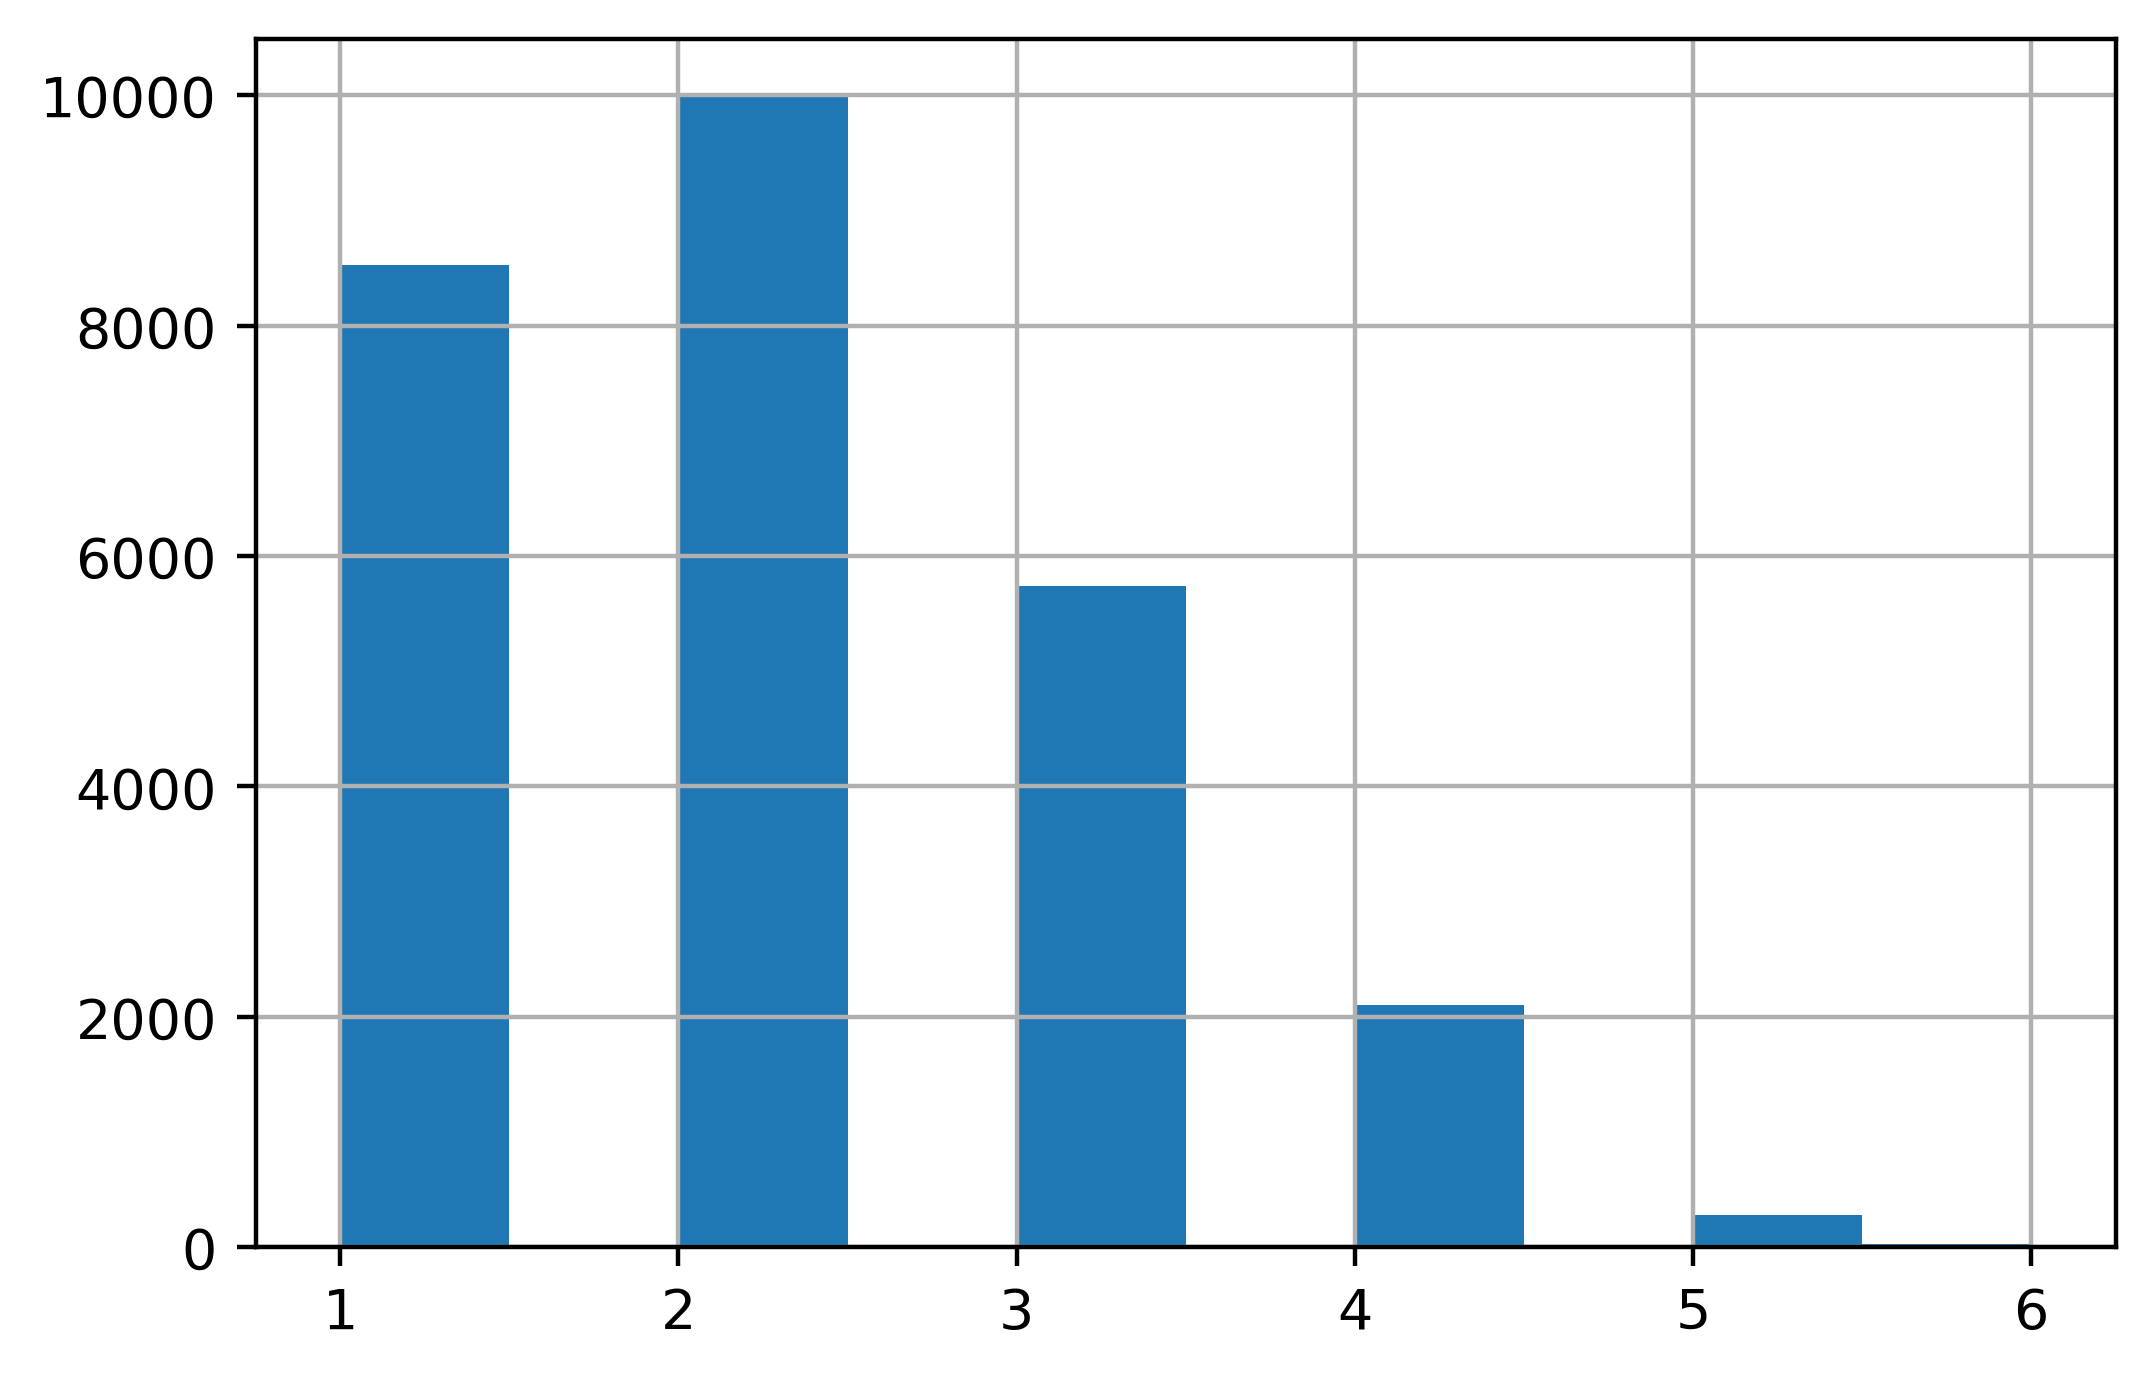

In [52]:
df['AgeBin'] = 0 #creates a column of 0
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = 1
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = 2
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = 3
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = 4
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = 5
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = 6
df.AgeBin.hist()

In [53]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
SE_MA        0
AgeBin       0
dtype: int64

In [54]:
df['Client_6'] = 1
df['Client_5'] = 1
df['Client_4'] = 1
df['Client_3'] = 1
df['Client_2'] = 1
df['Client_1'] = 1
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)) , 'Client_6'] = 0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)) , 'Client_5'] = 0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)) , 'Client_4'] = 0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)) , 'Client_3'] = 0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)) , 'Client_2'] = 0
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)) , 'Client_1'] = 0
pd.Series([df[df.Client_6 == 1].def_pay.count(),
          df[df.Client_5 == 1].def_pay.count(),
          df[df.Client_4 == 1].def_pay.count(),
          df[df.Client_3 == 1].def_pay.count(),
          df[df.Client_2 == 1].def_pay.count(),
          df[df.Client_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    23716
5    24200
4    24496
3    24698
2    25043
1    26192
dtype: int64

In [55]:
df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']

df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']

df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']

df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']

df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']

df[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'def_pay']].sample(20)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,def_pay
19380,300000,0.026720,8016,0.043462,18061,0.045039,14458,0.061200,32905,0.063595,21953,0
12977,160000,0.009806,120714,0.010041,122358,0.013010,110390,0.011861,105536,0.011059,102292,0
10641,120000,0.006808,32261,0.010200,32692,0.009006,32286,0.008744,31641,0.009498,31543,1
3418,50000,0.006260,18827,0.167290,33975,0.606393,55122,0.463840,52931,0.393420,55518,0
18789,180000,0.000000,0,0.007472,2690,0.023302,9893,0.018622,6750,0.020386,8689,0
10750,20000,0.000000,0,0.000000,0,0.316667,19000,0.241813,17845,0.196190,16619,1
18057,50000,0.005740,8638,0.004250,8276,0.004740,8562,0.004910,7633,0.004272,5219,1
22125,230000,0.000000,0,0.074541,34289,0.132704,57255,0.123975,22420,0.114044,17077,1
25213,50000,0.020000,2640,0.012480,2888,0.275607,41981,0.263720,50820,0.214616,49711,0
5807,90000,0.047189,55896,0.047261,58142,0.047511,60363,0.047739,62521,0.049238,65237,1


In [56]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'def_pay']].sample(20)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
11841,0.411611,0.399178,0.400519,0.084703,0.544895,0.560741,0
9010,0.997885,0.971441,0.997885,0.998830,0.998830,0.998830,0
27762,0.390500,0.334800,0.556800,0.328600,0.262600,0.635400,0
18702,0.306238,0.321146,0.194631,0.920400,0.657138,0.547608,0
8577,0.774968,0.787950,0.792364,0.787591,0.776527,0.781064,0
3066,1.000000,0.925700,0.958400,1.000000,0.958400,1.000000,0
25162,0.918185,0.920362,0.921385,0.926669,0.932077,0.929823,1
13671,0.436511,0.393178,0.320306,0.286989,0.271350,0.227239,0
26035,-0.019600,-0.017470,-0.015545,-0.015085,-0.015735,-0.016325,0
13958,0.822580,0.585930,0.580615,0.587915,0.561215,0.503545,0


In [57]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1
0,798fc410-45c1,20000,2,2,1,24,2,2,0,0,...,0.000000,0.011483,0.047387,0.046020,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350
1,8a8c8f3b-8eb4,120000,2,2,2,26,0,2,0,0,...,0.004213,0.003947,0.003050,0.004035,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,0.004344,0.003741,0.008272,0.043796,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,0.009360,0.154087,0.120370,0.099324,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200
4,3b7f77cc-dbc0,50000,1,2,1,57,0,0,0,0,...,0.114980,0.242620,0.214545,0.191424,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           26664 non-null  object 
 1   LIMIT_BAL    26664 non-null  int64  
 2   SEX          26664 non-null  int64  
 3   EDUCATION    26664 non-null  int64  
 4   MARRIAGE     26664 non-null  int64  
 5   AGE          26664 non-null  int64  
 6   PAY_1        26664 non-null  int64  
 7   PAY_2        26664 non-null  int64  
 8   PAY_3        26664 non-null  int64  
 9   PAY_4        26664 non-null  int64  
 10  PAY_5        26664 non-null  int64  
 11  PAY_6        26664 non-null  int64  
 12  BILL_AMT1    26664 non-null  int64  
 13  BILL_AMT2    26664 non-null  int64  
 14  BILL_AMT3    26664 non-null  int64  
 15  BILL_AMT4    26664 non-null  int64  
 16  BILL_AMT5    26664 non-null  int64  
 17  BILL_AMT6    26664 non-null  int64  
 18  PAY_AMT1     26664 non-null  int64  
 19  PAY_

In [59]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA', 'AgeBin', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']
y = df['def_pay'].copy() # target
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [61]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
X_train.shape

(21331, 33)

In [63]:
dt.max_depth = None

In [64]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
X_train.shape

(21331, 33)

In [66]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}
# params = {'max_depth':list(range(1,13))}

In [67]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=5, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)
#5/2020: removed arguments fit_params, iid

In [68]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             p

In [69]:
cv.best_params_

{'max_depth': 6}

In [70]:
cv.best_score_

0.7523954015494099

In [71]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [72]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043366,0.003899,0.004141,0.000543,1,{'max_depth': 1},0.645438,0.640268,0.649328,0.641357,...,0.645394,0.004121,7,0.645384,0.646675,0.644412,0.646404,0.644098,0.645395,0.001030
1,0.073905,0.001550,0.003705,0.000314,2,{'max_depth': 2},0.701537,0.692879,0.697053,0.682113,...,0.694010,0.006554,5,0.692757,0.694134,0.693858,0.697599,0.693275,0.694324,0.001705
2,0.136444,0.003537,0.003963,0.000398,4,{'max_depth': 4},0.756114,0.744610,0.764748,0.723234,...,0.745939,0.014136,2,0.755388,0.749543,0.753584,0.755208,0.758278,0.754400,0.002861
3,0.199449,0.004981,0.003998,0.000307,6,{'max_depth': 6},0.767616,0.756104,0.762045,0.731850,...,0.752395,0.012847,1,0.782976,0.777297,0.782688,0.783083,0.781349,0.781478,0.002181
4,0.262924,0.005361,0.004070,0.000382,8,{'max_depth': 8},0.745150,0.748832,0.744633,0.739786,...,0.743759,0.003333,3,0.814114,0.806063,0.810214,0.815913,0.809872,0.811235,0.003459
5,0.329105,0.021151,0.004990,0.000988,10,{'max_depth': 10},0.712245,0.720934,0.721146,0.721612,...,0.715714,0.007412,4,0.850026,0.840385,0.843399,0.850091,0.847122,0.846205,0.003802
6,0.376583,0.016274,0.004054,0.000346,12,{'max_depth': 12},0.671339,0.686018,0.684644,0.686968,...,0.675180,0.015222,6,0.889607,0.877927,0.883581,0.886909,0.890382,0.885681,0.004551


In [73]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

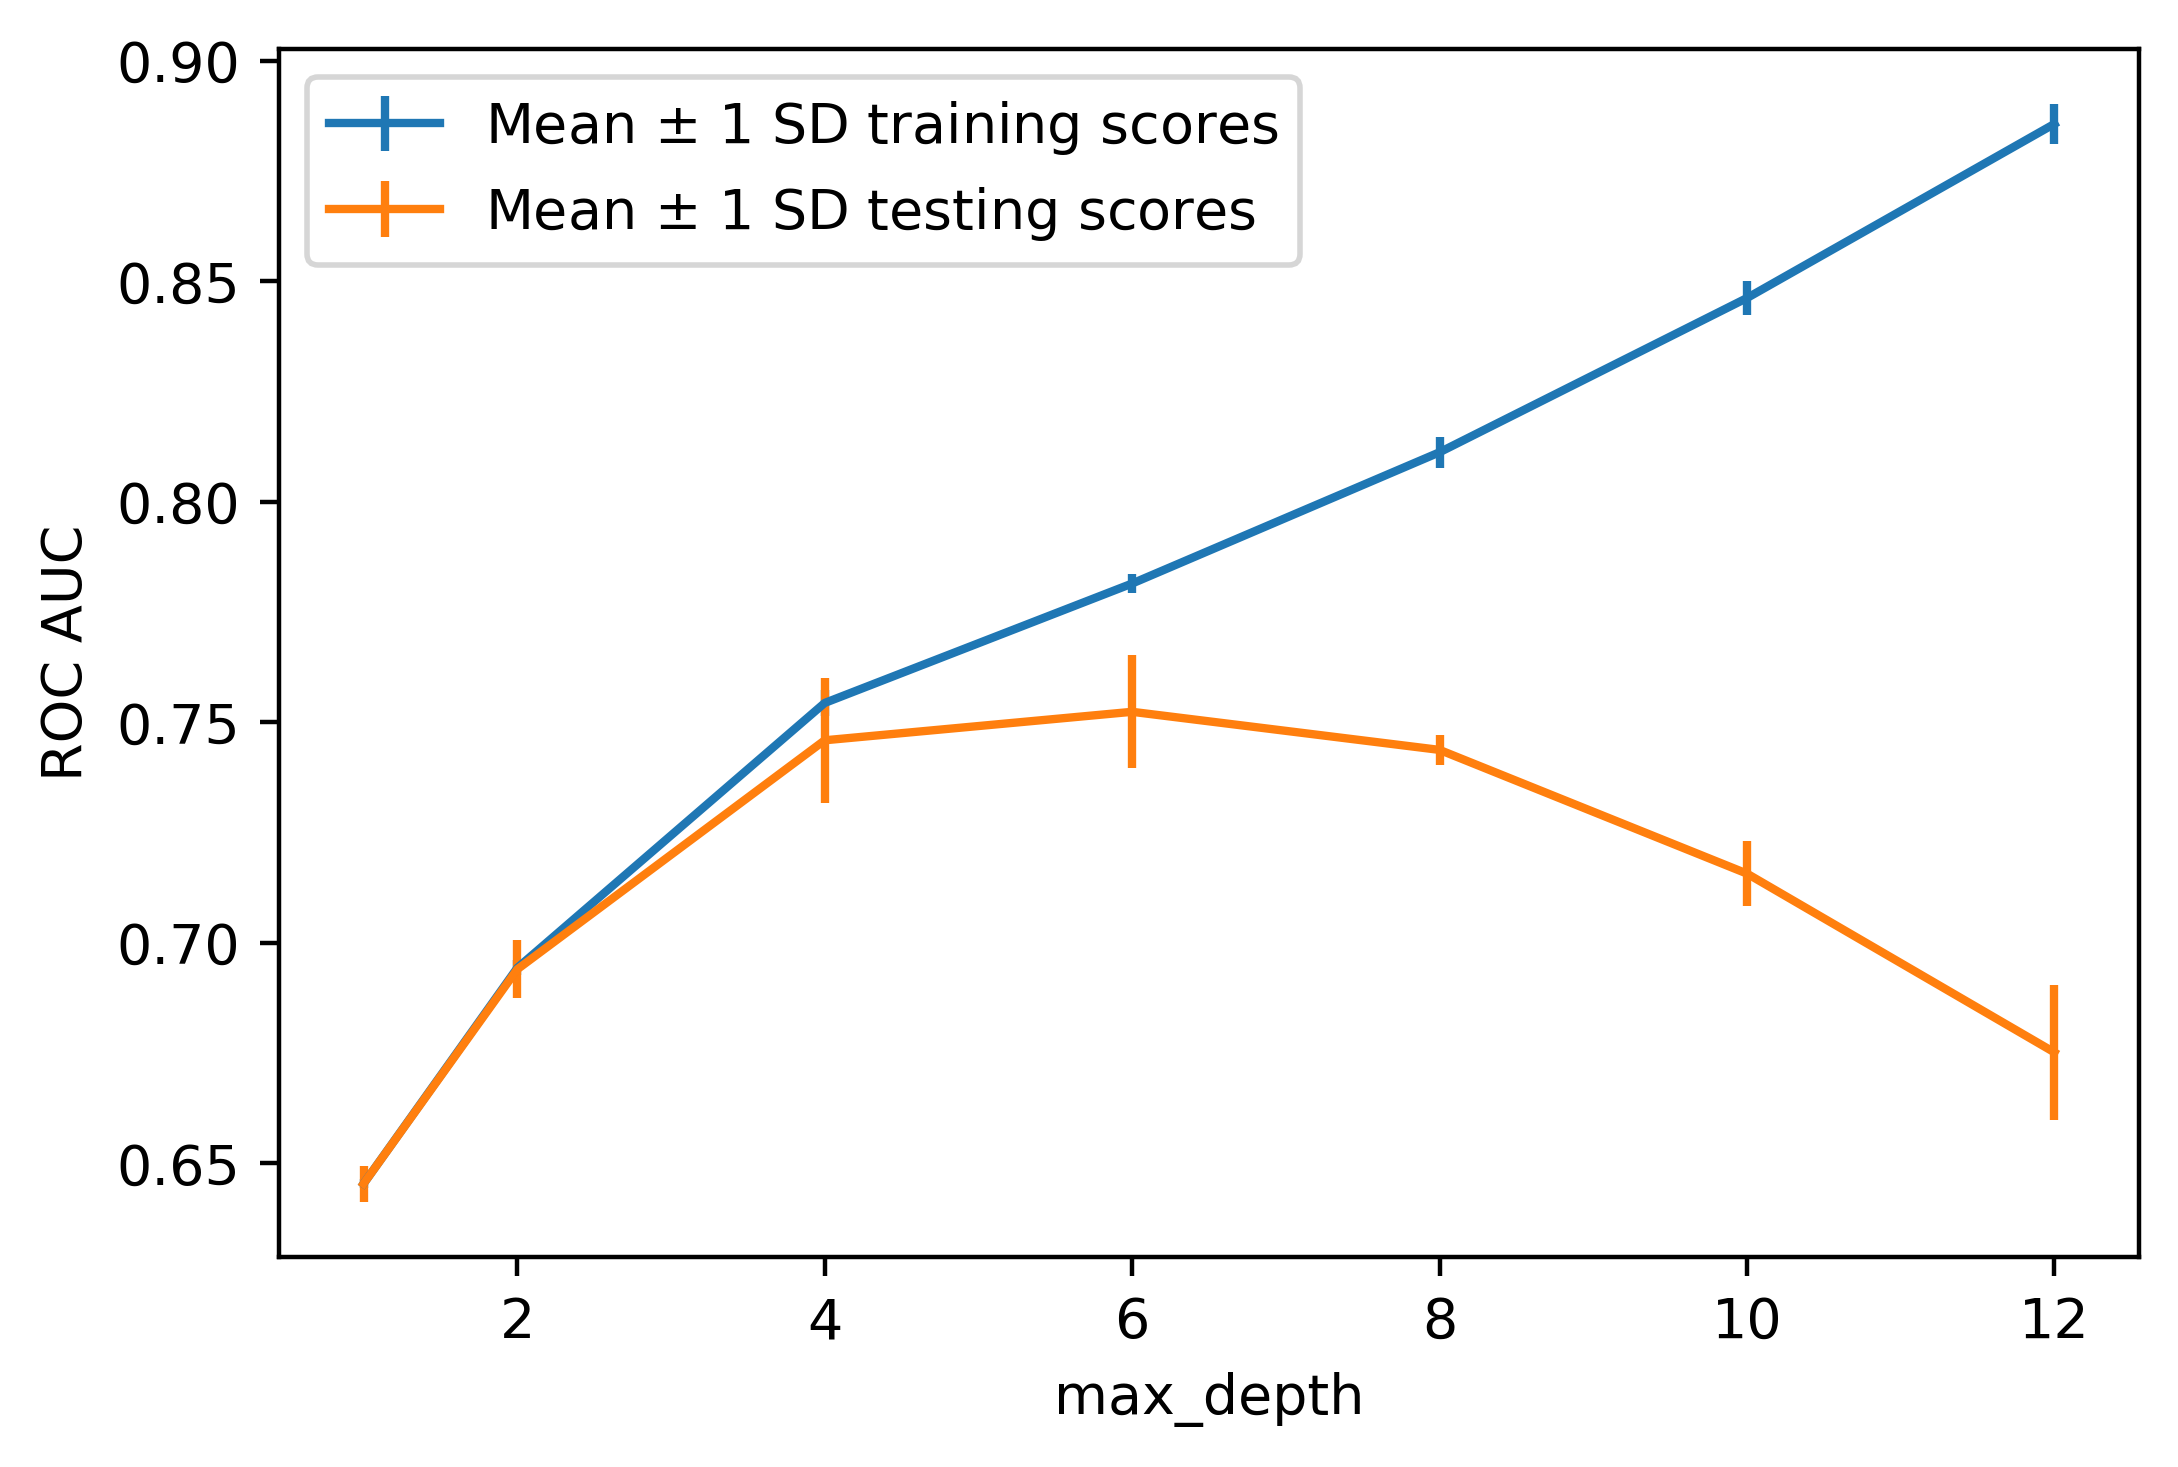

In [74]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [75]:
cv_results_df.max()

mean_fit_time          0.376583
std_fit_time           0.021151
mean_score_time        0.004990
std_score_time         0.000988
param_max_depth       12.000000
split0_test_score      0.767616
split1_test_score      0.756104
split2_test_score      0.764748
split3_test_score      0.739786
split4_test_score      0.744362
mean_test_score        0.752395
std_test_score         0.015222
rank_test_score        7.000000
split0_train_score     0.889607
split1_train_score     0.877927
split2_train_score     0.883581
split3_train_score     0.886909
split4_train_score     0.890382
mean_train_score       0.885681
std_train_score        0.004551
dtype: float64

In [76]:
from sklearn.ensemble import RandomForestClassifier

Now you ask Krish to make the CLassifier with the given parameters 

    (n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None)

In [77]:
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=5,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

In [78]:
rf_params_ex = {'n_estimators':list(range(1,10,50))}

And call the GridSearchCV over the rf

In [79]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, refit=True, cv=5, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)
#5/2020: removed arguments fit_params, iid

In [80]:
cv_rf_ex.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

Now, let's check the best parameters and accuracy, and store them and analyse like before

In [81]:
cv_rf_ex.best_params_

{'n_estimators': 1}

In [82]:
cv_rf_ex.best_score_

0.7205426495658337

In [83]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

In [84]:
cv_rf_ex_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030008,0.003822,0.005442,0.001486,1,{'n_estimators': 1},0.729383,0.727662,0.731939,0.695853,...,0.720543,0.013232,1,0.746325,0.731738,0.731681,0.741525,0.72473,0.7352,0.007717


In [85]:
cv_rf_ex_results_df.max()

mean_fit_time                   0.0300077
std_fit_time                   0.00382234
mean_score_time                0.00544167
std_score_time                 0.00148633
param_n_estimators                      1
params                {'n_estimators': 1}
split0_test_score                0.729383
split1_test_score                0.727662
split2_test_score                0.731939
split3_test_score                0.695853
split4_test_score                0.717876
mean_test_score                  0.720543
std_test_score                  0.0132318
rank_test_score                         1
split0_train_score               0.746325
split1_train_score               0.731738
split2_train_score               0.731681
split3_train_score               0.741525
split4_train_score                0.72473
mean_train_score                   0.7352
std_train_score                0.00771687
dtype: object

`Interpretation`: We have performed GridSearchCV with just one parameter and analysed it, now we will analyse it using both max_depth and n_estimators.


#  Cross-Validation Grid Search with Random Forest

Here, we create the dictionary for parameters, both max_depth and n_estimators.

In [86]:
rf_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

And call the optimisation function here

In [87]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=2,
                  error_score=np.nan, return_train_score=True)
#5/2020: removed arguments fit_params, iid

In [88]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [89]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [90]:
cv_rf.best_score_


0.7852971047098547

`Interpretation`: We have seen how this model gives the maximum accuracy.

Now you ask him to store these results in to a dataframe for analysis

In [91]:
cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

In [92]:
cv_rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.352706,0.008558,0.013076,0.003433,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.767466,0.773940,0.763982,0.767969,0.768339,0.003579,15,0.769703,0.774935,0.777020,0.777186,0.774711,0.003024
1,1.271938,0.008862,0.061624,0.007468,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.776153,0.778571,0.769242,0.773274,0.774310,0.003475,14,0.777418,0.777943,0.780283,0.781283,0.779232,0.001602
2,3.197510,0.020523,0.105654,0.005711,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.778979,0.779933,0.770593,0.776061,0.776391,0.003639,11,0.780532,0.779569,0.782689,0.782813,0.781401,0.001393
3,4.597367,0.111135,0.190940,0.053721,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.779475,0.780755,0.770770,0.776099,0.776775,0.003861,10,0.781255,0.780084,0.782449,0.782647,0.781609,0.001029
4,0.420333,0.019831,0.023341,0.009934,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.782961,0.779289,0.766296,0.775436,0.775996,0.006200,12,0.801644,0.799707,0.802721,0.802966,0.801759,0.001285
5,2.783190,0.010083,0.083196,0.023595,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.785930,0.785598,0.775756,0.779589,0.781718,0.004268,8,0.804972,0.804529,0.806711,0.806754,0.805742,0.001003
6,4.032539,0.032882,0.067471,0.002979,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.786771,0.787328,0.776860,0.780918,0.782969,0.004330,6,0.806017,0.805706,0.807580,0.807733,0.806759,0.000906
7,8.691703,0.093387,0.170849,0.048995,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.787242,0.787552,0.777382,0.781159,0.783334,0.004279,5,0.807010,0.806812,0.808933,0.808385,0.807785,0.000898
8,0.549840,0.020527,0.020999,0.002103,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.774837,0.784269,0.766292,0.773801,0.774800,0.006384,13,0.850163,0.851390,0.851273,0.856870,0.852424,0.002611
9,2.750113,0.041603,0.057167,0.015742,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.786262,0.790453,0.778592,0.779150,0.783614,0.004973,4,0.860785,0.860872,0.862617,0.862486,0.861690,0.000863


In [93]:
cv_rf_results_df.max()

mean_fit_time          17.035398
std_fit_time            0.111135
mean_score_time         0.282590
std_score_time          0.053721
param_max_depth        12.000000
param_n_estimators    200.000000
split0_test_score       0.788523
split1_test_score       0.790453
split2_test_score       0.781366
split3_test_score       0.781440
mean_test_score         0.785297
std_test_score          0.006384
rank_test_score        16.000000
split0_train_score      0.939186
split1_train_score      0.937329
split2_train_score      0.936197
split3_train_score      0.937289
mean_train_score        0.937500
std_train_score         0.003024
dtype: float64

`Interpretation`: Looks like, from max_depth = 3, 6, 9, 12... 9 is best. The more trees the better.

In [94]:
cv_rf.best_params_

{'max_depth': 9, 'n_estimators': 200}

Now, finally, you ask Krish to store thee feature importances un a dataframe using 

    pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf.best_estimator_.feature_importances_
    })

In [95]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf.best_estimator_.feature_importances_
})

NameError: name 'features_response' is not defined

And display their values in dessending order (Highest first)

In [ ]:
feat_imp_df_act.sort_values('Importance', ascending=False)

# Conclusion

We have anaylysed our decision tree model to predict whether the person will be a defaulter ot not.

We can conclude the following:

Pros

    Decision trees are easy to interpret and visualize.
    It can easily capture Non-linear patterns.
    It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
    It can be used for feature engineering such as predicting missing values, suitable for variable selection.
    The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

Cons

    Sensitive to noisy data. It can overfit noisy data.
    The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
    Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.
